In [1]:
# Imports 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Read in the data 
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
# Getting the fields of the data 
sentences = df['Sentence'].to_list()
sentiment = df['Sentiment'].to_list()

In [5]:
# Converting the sentences and sentiments into a numpy array
sentences = np.array(sentences)
sentiment = np.array(sentiment)

In [6]:
# Creating the training and the testing data 
train_size = len(sentences) - 100

train_sentences = sentences[0:train_size]
test_sentences = sentences[train_size:]

train_sentiment = sentiment[0:train_size]
test_sentiment = sentiment[train_size:]

In [7]:
# Replacing Positive with 0, Negative with 1 and Neutral with 2
for i in range(len(train_sentiment)):
    if str(sentiment[i]) == "positive":
        train_sentiment[i] = float(0)
        
    elif str(sentiment[i]) == "negative":
        train_sentiment[i] = float(1)
        
    elif str(sentiment[i]) == "neutral":
        train_sentiment[i] = float(2)

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_sentiment = lb.fit_transform(train_sentiment)

In [9]:
# Tokenizing the training text 
vocab_size = 10000
oov_tok = "<OOV>"
max_length = 100
trunc_type='post'
padding_type='post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [13]:
embedding_dim = 16


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(training_padded, train_sentiment, epochs=30)

Epoch 1/30
180/180 [==============================] - 1s 2ms/step - loss: 1.0291 - accuracy: 0.4840
Epoch 2/30
180/180 [==============================] - 0s 2ms/step - loss: 0.9697 - accuracy: 0.5337
Epoch 3/30
180/180 [==============================] - 0s 2ms/step - loss: 0.9110 - accuracy: 0.5471
Epoch 4/30
180/180 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.6426
Epoch 5/30
180/180 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.6816
Epoch 6/30
180/180 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7353
Epoch 7/30
180/180 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7530
Epoch 8/30
180/180 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7891
Epoch 9/30
180/180 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8062
Epoch 10/30
180/180 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8228

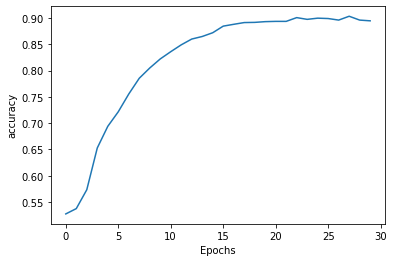

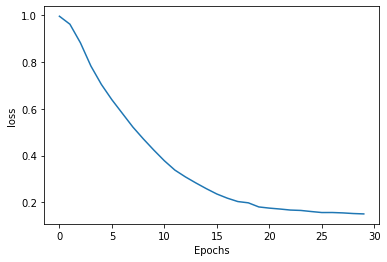

In [15]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
# Getting the model summary 
model.summary()

# Saving the model 
model.save("financial_sentiment_analysis-model-v1.0")

print("MODEL SAVED SUCCESSFULLY")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_4 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 164,199
Trainable params: 164,199
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: financial_sentiment_analysis-model-v1.0/assets
MODEL SAVED SUCCESSFULLY


In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [18]:
class_names = ["Positive", "Negative", "Neutral"]

sentence = [test_sentences[3]]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

prediction = class_names[np.argmax(model.predict(padded))]
probabilities = model.predict(padded)

print(probabilities)
print(prediction)

[[0.99729085 0.32996905 0.02266571]]
Positive
